# Linear Regression on Boston House Pricing dataset 

## Data Description:-

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000

- Ptratio: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s 

### Importing required libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### importing the dataset

In [29]:
boston = pd.read_csv('BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
# since it is a cleaned data , so there are no NA's
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Splitting into X(Features)  and  Y(Target)

In [31]:
X = boston.drop(['medv'], axis = 1)
X

y = boston.medv
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

### Creating a Train, Test Split of 80/20

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [34]:
X_test.shape, y_test.shape

((102, 13), (102,))

### Creating a Linear Regression Model

In [35]:
from sklearn import linear_model

# Creating a instance of model
LR = linear_model.LinearRegression()
# Fitting the model
LR.fit(X_train, y_train)
# Prediting on X_test
pred = LR.predict(X_test)

###  Mean Squared Error, R2_score

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficient: ',LR.coef_)
print('Intercept: ',LR.intercept_)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, pred))


Coefficient:  [-1.08146997e-01  4.56782926e-02  6.66863021e-02  2.68596220e+00
 -1.87155453e+01  4.17499106e+00  4.25035934e-03 -1.39398807e+00
  3.59101948e-01 -1.42719763e-02 -9.25664624e-01  9.23610417e-03
 -5.50891828e-01]
Intercept:  33.883242288977236
Mean Squared Error: 24.46
Coefficient of determination: 0.70


### Visualizing the predicted value with scatter plot

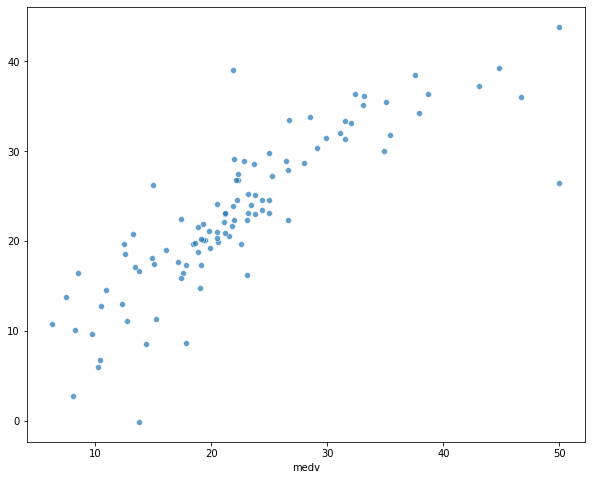

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_test, pred, marker='o', alpha=0.7)